[View in Colaboratory](https://colab.research.google.com/github/BikashShaw/MLPractice/blob/master/keras_reuters.ipynb)

Loading the Reuters dataset

In [0]:
from tensorflow.python.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Decoding newswires back to text

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

Encoding the data

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Categorical encoding (also known as One-hot encoding)

In [0]:
from tensorflow.python.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Model definition

In [0]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compiling the model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Setting aside a validation set

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Training the model

In [26]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 151us/step - loss: 2.5435 - acc: 0.5031 - val_loss: 1.7008 - val_acc: 0.6370
Epoch 2/20
7982/7982 [==============================] - 1s 137us/step - loss: 1.4130 - acc: 0.7056 - val_loss: 1.3201 - val_acc: 0.6950
Epoch 3/20
7982/7982 [==============================] - 1s 148us/step - loss: 1.0583 - acc: 0.7811 - val_loss: 1.1456 - val_acc: 0.7670
Epoch 4/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.8340 - acc: 0.8271 - val_loss: 1.0256 - val_acc: 0.8000
Epoch 5/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.6617 - acc: 0.8621 - val_loss: 0.9641 - val_acc: 0.8090
Epoch 6/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.5323 - acc: 0.8911 - val_loss: 0.9222 - val_acc: 0.8140
Epoch 7/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.4280 - acc: 0.9099 - val_loss: 0.9052 - val_acc: 0.8150


7982/7982 [==============================] - 1s 150us/step - loss: 0.2895 - acc: 0.9365 - val_loss: 0.8880 - val_acc: 0.8170
Epoch 10/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.2402 - acc: 0.9451 - val_loss: 0.9256 - val_acc: 0.8080
Epoch 11/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.2094 - acc: 0.9485 - val_loss: 0.9323 - val_acc: 0.8130
Epoch 12/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.1821 - acc: 0.9508 - val_loss: 0.9333 - val_acc: 0.8120
Epoch 13/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.1669 - acc: 0.9524 - val_loss: 0.9425 - val_acc: 0.8100
Epoch 14/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.1506 - acc: 0.9550 - val_loss: 1.0045 - val_acc: 0.8070
Epoch 15/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.1409 - acc: 0.9549 - val_loss: 0.9778 - val_acc: 0.8080
Epoch 16/20
7982/7982 [==============================

7982/7982 [==============================] - 1s 149us/step - loss: 0.1213 - acc: 0.9567 - val_loss: 1.0497 - val_acc: 0.8060
Epoch 19/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.1200 - acc: 0.9563 - val_loss: 1.0695 - val_acc: 0.8040
Epoch 20/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.1112 - acc: 0.9570 - val_loss: 1.0434 - val_acc: 0.8020


Plotting the training and validation loss

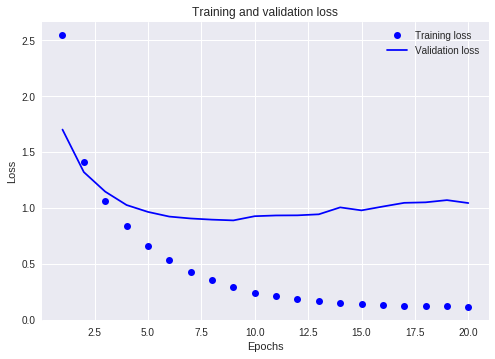

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting the training and validation accuracy

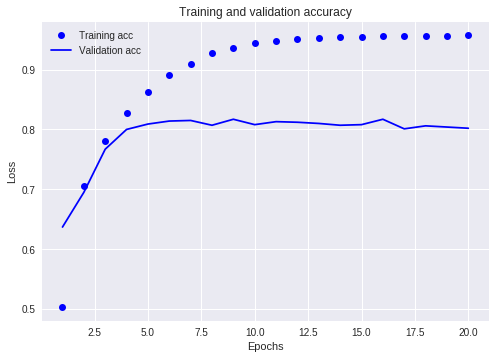

In [28]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Retraining a model from scratch

In [29]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 160us/step - loss: 2.5634 - acc: 0.5421 - val_loss: 1.6525 - val_acc: 0.6550
Epoch 2/9
7982/7982 [==============================] - 1s 128us/step - loss: 1.3511 - acc: 0.7145 - val_loss: 1.2683 - val_acc: 0.7150
Epoch 3/9
7982/7982 [==============================] - 1s 150us/step - loss: 1.0032 - acc: 0.7853 - val_loss: 1.0998 - val_acc: 0.7580
Epoch 4/9
7982/7982 [==============================] - 1s 151us/step - loss: 0.7980 - acc: 0.8299 - val_loss: 1.0172 - val_acc: 0.7900
Epoch 5/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.6287 - acc: 0.8701 - val_loss: 0.9627 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.5037 - acc: 0.8954 - val_loss: 0.9123 - val_acc: 0.8060
Epoch 7/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.4101 - acc: 0.9153 - val_loss: 0.8849 - val_acc: 0.8150
Epoch 8

2246/2246 [==============================] - 0s 117us/step
[1.0043248024139677, 0.7827248441939468]
